In [1]:
import tensorflow as tf 
import os 

In [2]:
dir_path = os.path.abspath('')
training_folder = os.path.join(dir_path,'Training')
validation_folder = os.path.join(dir_path,'Validation')

training_with_mask_folder = os.path.join(training_folder,'with_mask')
training_without_mask_folder = os.path.join(training_folder,'without_mask')

validation_with_mask_folder = os.path.join(validation_folder,'with_mask')
validation_without_mask_folder = os.path.join(validation_folder,'without_mask')

In [3]:
print('Number of training examples:',len(os.listdir(training_with_mask_folder))+len(os.listdir(training_without_mask_folder)))
print('Number of validation examples:',len(os.listdir(validation_with_mask_folder))+len(os.listdir(validation_without_mask_folder)))

Number of training examples: 2682
Number of validation examples: 1151


In [4]:
train_with_mask_fname = os.listdir(training_with_mask_folder)
train_without_mask_fname = os.listdir(training_without_mask_folder)

print(train_with_mask_fname[:10])
print(train_without_mask_fname[:10])

['0_0_0 copy 12.jpg', '0_0_0 copy 14.jpg', '0_0_0 copy 15.jpg', '0_0_0 copy 16.jpg', '0_0_0 copy 17.jpg', '0_0_0 copy 19.jpg', '0_0_0 copy 2 2.jpg', '0_0_0 copy 2.png', '0_0_0 copy 20.jpg', '0_0_0 copy 21.jpg']
['0_0_aidai_0029.jpg', '0_0_aidai_0074.jpg', '0_0_aidai_0084.jpg', '0_0_aidai_0136.jpg', '0_0_anhu_0004.jpg', '0_0_anhu_0025.jpg', '0_0_anhu_0027.jpg', '0_0_anhu_0057.jpg', '0_0_anhu_0062.jpg', '0_0_anhu_0063.jpg']


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

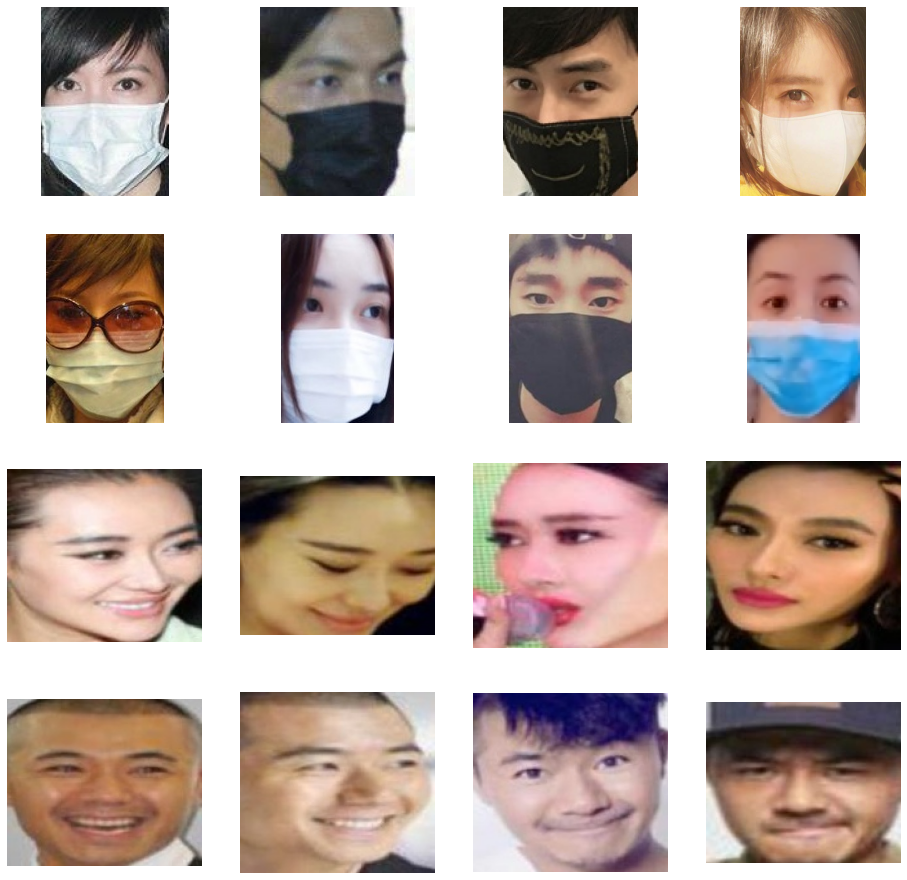

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_with_mask_pix = [os.path.join(training_with_mask_folder, fname) 
                for fname in train_with_mask_fname[ pic_index-8:pic_index] 
               ]

next_without_mask_pix = [os.path.join(training_without_mask_folder, fname) 
                for fname in train_without_mask_fname[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_with_mask_pix+next_without_mask_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        training_folder,  
        target_size=(200, 250),
        batch_size=64,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_folder,
        target_size=(200, 250),  
        batch_size=32,
        class_mode='binary')

Found 2682 images belonging to 2 classes.
Found 1151 images belonging to 2 classes.


In [8]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from keras import regularizers

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(200,250,3),kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

Using TensorFlow backend.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 124, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 122, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 27, 128)       1

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=41,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,   
      validation_steps=35)

Epoch 1/30
41/41 [==============================] - 66s 2s/step - loss: 0.4739 - accuracy: 0.7807 - val_loss: 0.2243 - val_accuracy: 0.9259
Epoch 2/30
41/41 [==============================] - 33s 813ms/step - loss: 0.2363 - accuracy: 0.9156 - val_loss: 0.2001 - val_accuracy: 0.9312
Epoch 3/30
41/41 [==============================] - 32s 772ms/step - loss: 0.2027 - accuracy: 0.9286 - val_loss: 0.2161 - val_accuracy: 0.9312
Epoch 4/30
41/41 [==============================] - 32s 785ms/step - loss: 0.1829 - accuracy: 0.9320 - val_loss: 0.1801 - val_accuracy: 0.9500
Epoch 5/30
41/41 [==============================] - 32s 774ms/step - loss: 0.1620 - accuracy: 0.9416 - val_loss: 0.1634 - val_accuracy: 0.9446
Epoch 6/30
41/41 [==============================] - 38s 919ms/step - loss: 0.1599 - accuracy: 0.9417 - val_loss: 0.1547 - val_accuracy: 0.9509
Epoch 7/30
41/41 [==============================] - 32s 786ms/step - loss: 0.1461 - accuracy: 0.9473 - val_loss: 0.1475 - val_accuracy: 0.9634
Ep

In [12]:
model.save('fmc.h5')

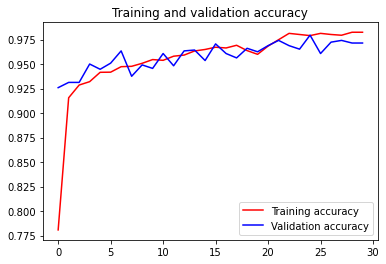

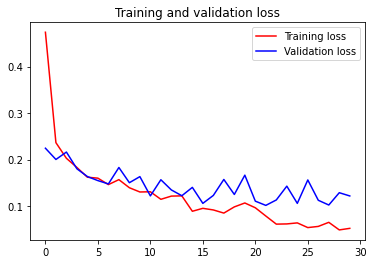

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()